# MODEL ANALYSIS

In [20]:
from time import time
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
% matplotlib inline

## LOAD TEST SET

In [19]:
df = pd.read_csv('data/wheat-2014-supervised.csv')
drop_cols = ['CountyName','State','Date', 'precipTypeIsOther'] + ['Latitude','Longitude'] 
df.drop(drop_cols,axis=1,inplace=True)
df.dropna(inplace=True)

## LOAD MODELS

In [39]:
with open('models/trained_model_Linear.plk','rb') as f:
    LR_model = pickle.load(f)
with open('models/trained_model_Random Forest.plk','rb') as f:
    RF_model = pickle.load(f)
with open('models/trained_model_Gradient Boost.plk','rb') as f:
    GB_model = pickle.load(f)
    
models = {}
models['Linear'] = LR_model
models['Random Forest'] = RF_model
models['Gradient Boost'] = GB_model    

## MAKE/SAVE PREDICTIONS

In [44]:
with open('pickles/SBS_feat_set.plk','rb') as f:
    sbs_dict = pickle.load(f)
# y_pred = {}
# for name,model in models.items():
#     if name == 'Random Forest':
#         k = 4
#     else:
#         k = 8
#     X_test = np.matrix(df.ix[:,:-1])[:,list(sbs_dict[name][k])]
#     y_true = np.array(df.ix[:,-1])
#     y_pred[name] = [model.predict(X_test[i]) for i in range(len(X_test))]
# with open('pickles/predictions.plk','wb') as f:
#     pickle.dump(y_pred,f)   

## MODEL ANALYSIS

In [45]:
with open('pickles/predictions.plk','rb') as f:
    y_preds = pickle.load(f)  

In [63]:
def regression_analysis(name,y_true,y_pred):  
    figs,axs = plt.subplots(ncols=2,nrows=1)
    figs.set_figwidth(15)
    figs.set_figheight(10)   
    ax = axs[0]
    ax.scatter(y_pred,abs(y_true)-abs(y_pred))
    ax.plot(np.linspace(-100,100),np.linspace(-100,100)*0, '--r')
    if name == 'Linear':
            ax.set_xlim([-100,50])
            ax.set_ylim([-80,80])
    else:
            ax.set_xlim([0,100])
            ax.set_ylim([-60,60])
    ax.set_title('Residual VS. Predicted (MODEL:{})'.format(name))
    ax.set_xlabel('Predicted Yield')
    ax.set_ylabel('Residual')
    ax.grid(True)
    
    ax = axs[1]
    ax.scatter(y_true,y_pred)
    ax.plot([0,78],[0,78],'--r')
    ax.set_xlim([0,80])
    ax.set_ylim([0,80])
    ax.set_title('Predicted VS. True (MODEL:{})'.format(name))
    ax.set_xlabel('True Yield')
    ax.set_ylabel('Predicted Yield')
    ax.grid(True)

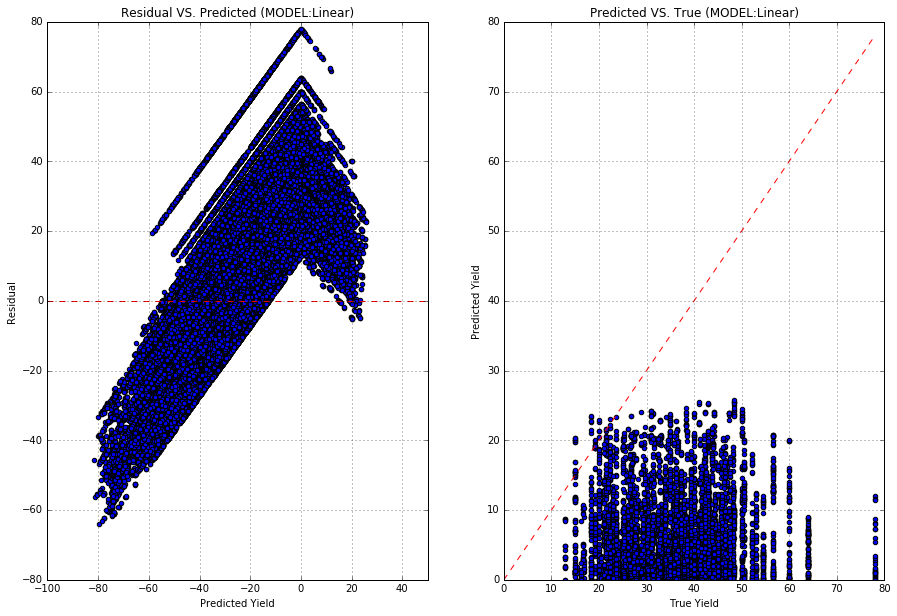

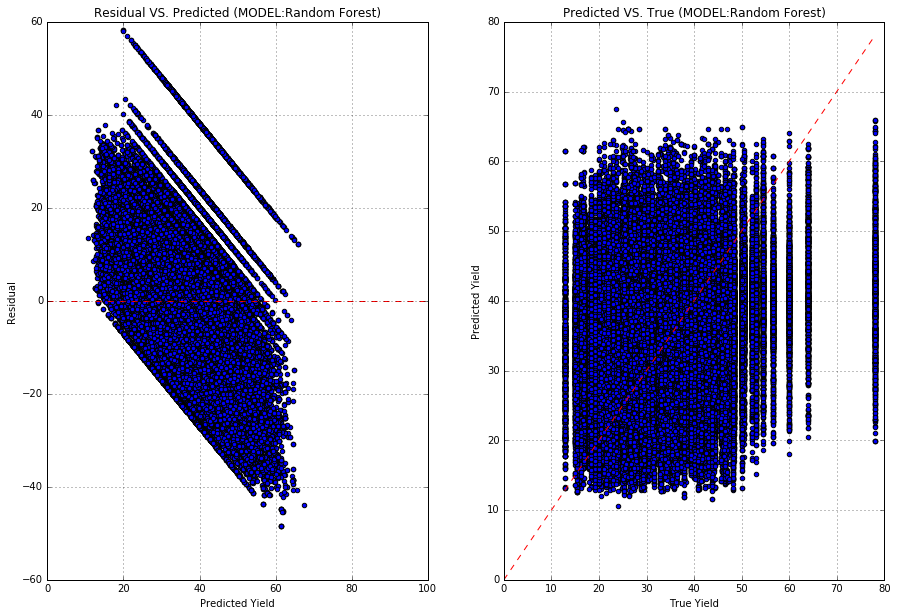

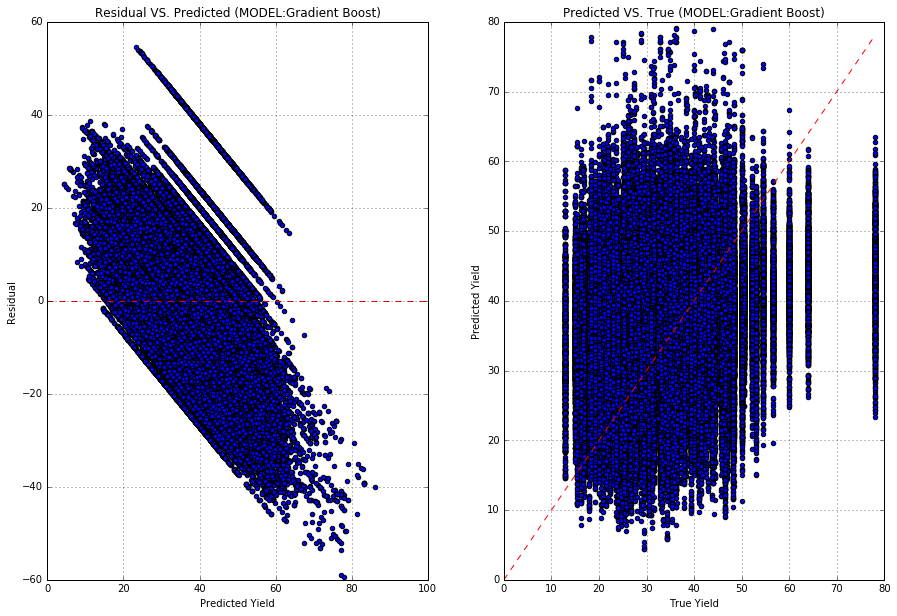

In [64]:
names = ['Linear','Random Forest','Gradient Boost']
for name in names:
    y_true = np.array(df.ix[:,-1]).reshape(len(df),1)#[:10000]
    y_pred = np.array(y_preds[name])#[:10000]
    regression_analysis(name,y_true,y_pred)